In [1]:
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

from keras.datasets import cifar100

In [2]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

169017344/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


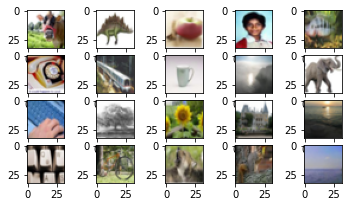

In [3]:
for i in range(0,20):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
plt.show()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255 
x_test /=255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
model_im = Sequential()
model_im.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape= (32,32,3)))
model_im.add(MaxPooling2D(pool_size=(2, 2)))
model_im.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model_im.add(MaxPooling2D(pool_size=(2, 2)))
model_im.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model_im.add(MaxPooling2D(pool_size=(2, 2)))
model_im.add(Flatten())
model_im.add(Dense(1024, activation='relu'))
model_im.add(Dense(100, activation='softmax'))

In [6]:
opt = SGD(lr=0.01,momentum=0.9)
model_im.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (10000, 100) (50000, 100)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
history=model_im.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1 ,validation_data=(x_test,y_test))

Epoch 1/10
391/391 [==============================] - 130s 332ms/step - loss: 4.2890 - accuracy: 0.0535 - val_loss: 3.8551 - val_accuracy: 0.1143
Epoch 2/10
391/391 [==============================] - 127s 325ms/step - loss: 3.5893 - accuracy: 0.1607 - val_loss: 3.3831 - val_accuracy: 0.2029
Epoch 3/10
391/391 [==============================] - 127s 325ms/step - loss: 3.1438 - accuracy: 0.2401 - val_loss: 3.0107 - val_accuracy: 0.2670
Epoch 4/10
391/391 [==============================] - 127s 326ms/step - loss: 2.7905 - accuracy: 0.3074 - val_loss: 2.7968 - val_accuracy: 0.3067
Epoch 5/10
391/391 [==============================] - 128s 327ms/step - loss: 2.5091 - accuracy: 0.3638 - val_loss: 2.6750 - val_accuracy: 0.3426
Epoch 6/10
391/391 [==============================] - 128s 326ms/step - loss: 2.2662 - accuracy: 0.4143 - val_loss: 2.5388 - val_accuracy: 0.3717
Epoch 7/10
391/391 [==============================] - 126s 324ms/step - loss: 2.0294 - accuracy: 0.4699 - val_loss: 2.5083 -

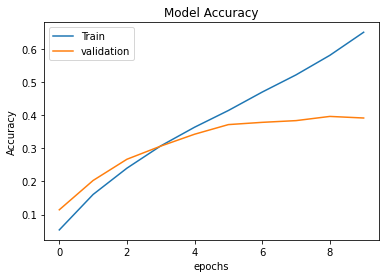

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [9]:
model_im.save('cifar100_2.h5')
model123 = load_model('cifar100_2.h5')

In [10]:
subject= ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
subject = np.array(subject)

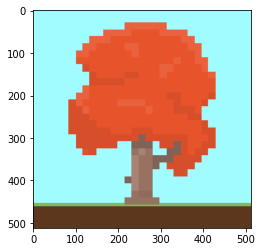

['maple_tree']


In [17]:
filename = 'Tree.png'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (32,32))
img = img_to_array(img)
img =  img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model123.predict(img),axis= -1)
print(subject[kq])